All required imports

In [1]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
import keras
from matplotlib import pyplot as plt

Using TensorFlow backend.


This loads data into pandas dataframes

In [2]:
try:
    root
except:
    root = os.getcwd()

data_path = os.path.join(root, "../skin-cancer-mnist-ham10000")

# the associated meta data
metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))

# the pixels RGB
X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))

In [3]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [5]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = metadata.loc[:, 'dx']
y = pd.get_dummies(data=y, columns=['dx'])
y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [7]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


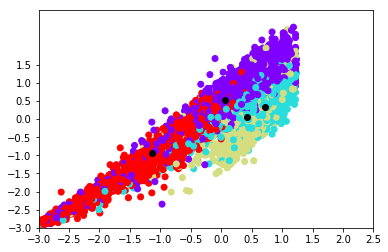

(array([ 0.05575897,  0.71575729,  0.42148871, -1.13490165]), array([ 0.51806755,  0.34682796,  0.04687472, -0.93333446]))


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
# Standardizing features
x = X_pixels.values
x = StandardScaler().fit_transform(x)

#Labels
y_ = y.values*(np.arange(7)+1)
Y = np.sum(y_,1)
labels = pd.DataFrame({'Label': Y})

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans.fit_predict(x)
#plt.scatter(X[:,0], X[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.axes
plt.xlim([-3, 2])
plt.ylim([-3,3])
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(-3, 3, 0.5))
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

print(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1])



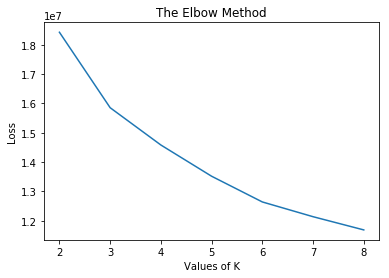

In [28]:
loss_ls = []
for K in range(2,9):
    kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred = kmeans.fit(x) 
    loss_ls.append(pred.inertia_)
plt.plot(range(2,9), loss_ls)
plt.xlabel('Values of K') 
plt.ylabel('Loss') 
plt.title('The Elbow Method') 
plt.show() 